In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [6]:
## fbprophet requires the data columns to be named as ds and y
df.columns = ['ds','y']

In [7]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
## another thing we need to make sure is that the ds column should be pandas 
## datetime object
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [12]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# placeholder for the future predictions
future = model.make_future_dataframe(periods=24,freq='MS')

In [15]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [16]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [17]:
len(df)

324

In [18]:
len(future)

348

In [19]:
forecast = model.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1160.893777,1468.825928,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1192.457668,1504.679144,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1432.029401,1765.343643,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1421.237987,1752.199957,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1681.637189,1993.677662,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.687845,5068.871500,5394.449073,5188.667649,5212.125822,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4921.822577,5239.986890,5204.142971,5229.260558,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5026.176454,5354.657612,5218.631742,5245.896702,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5171.052628,5486.828286,5233.304410,5263.179750,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749


In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1160.893777,1468.825928,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1192.457668,1504.679144,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1432.029401,1765.343643,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1421.237987,1752.199957,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1681.637189,1993.677662,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [22]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
324,2019-01-01,4281.436944,4599.826525,4444.430853
325,2019-02-01,4310.669216,4634.567583,4469.157344
326,2019-03-01,4552.782929,4870.241893,4709.682968
327,2019-04-01,4567.414517,4893.625982,4732.643856
328,2019-05-01,4834.900870,5172.335841,5003.972986
329,2019-06-01,4815.605188,5149.779244,4993.722408
330,2019-07-01,4977.670210,5302.192793,5139.893745
331,2019-08-01,4892.314399,5218.299697,5047.898770
332,2019-09-01,4749.760057,5072.886029,4907.836992
333,2019-10-01,4836.801863,5143.033117,4989.264478


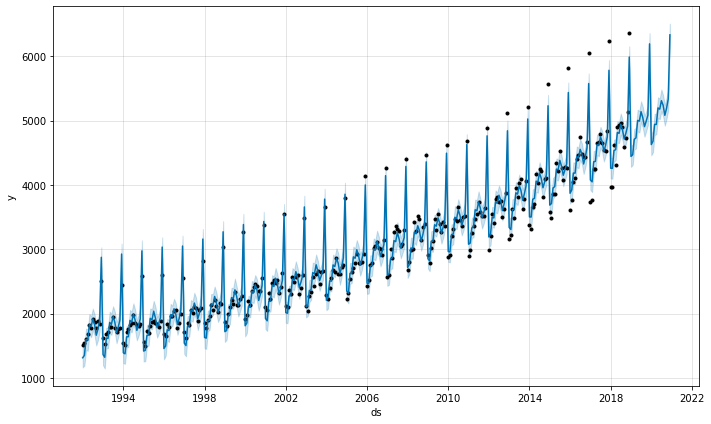

In [26]:
import matplotlib.pyplot as plt
model.plot(forecast);

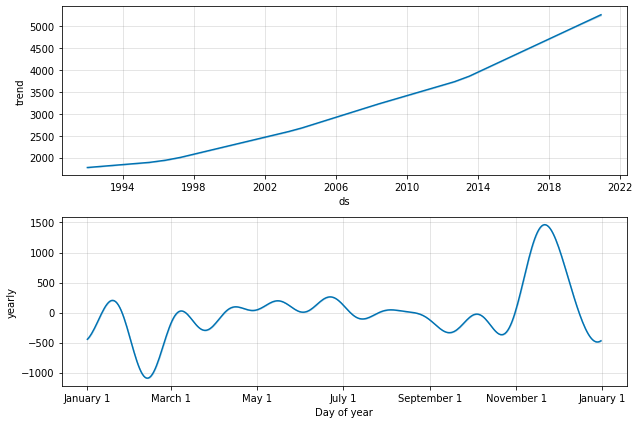

In [33]:
model.plot_components(forecast);

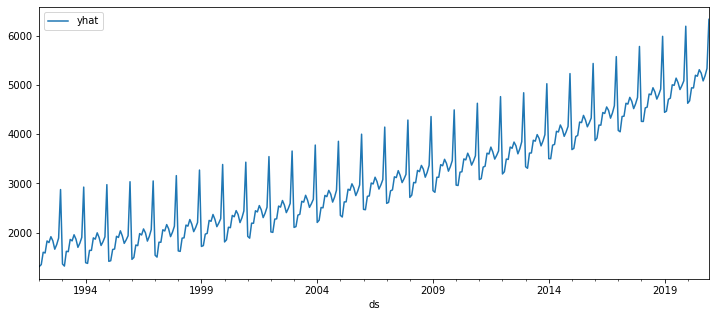

In [30]:
## plotting the forecasted values using maytplotlib
forecast.plot(x='ds',y='yhat',figsize=(12,5));